In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.colors import ListedColormap

In [54]:
Dataset_1 = pd.read_csv("Data/Top_20_tracks.csv")
Dataset_2 = pd.read_csv("Data/Top_song_features.csv")
Dataset_3 = pd.read_csv("Data/Top_genres.csv")

Text(0.5, 1.0, 'My top Spotify songs rated by danceability')

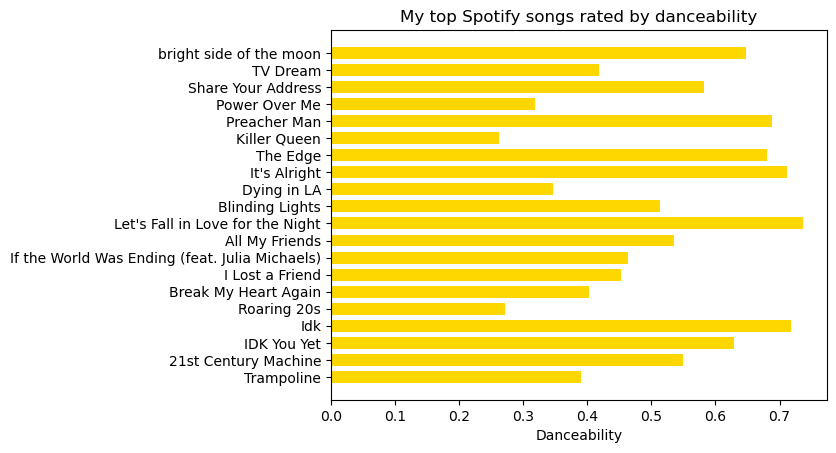

In [55]:
#Visualization
plt.barh(Dataset_1['track_title'], Dataset_2['danceability'], height = 0.7, color = '#FFD700')
plt.gca().invert_yaxis()
plt.xlabel('Danceability')
plt.title('My top Spotify songs rated by danceability')

In [58]:
Dataset_1

,Unnamed: 0,track_title,artists,popularity,uri,duration
0,0,bright side of the moon,['Christian French'],46,spotify:track:5r4G5w8ujwefEnrCT5uzoX,190661
1,1,TV Dream,['Larkins'],0,spotify:track:52zQtUaYzFCHWP7Jzi24pz,226666
2,2,Share Your Address,['Ben Platt'],53,spotify:track:74IgSPXYXx7v95NpCzGgsW,182466
3,3,Power Over Me,['Dermot Kennedy'],73,spotify:track:4tViDtaHuSLnh7HVJTrKhs,206960
4,4,Preacher Man,['THE DRIVER ERA'],51,spotify:track:0oeW7qeQnBULDmDWsq4w5o,219389
5,5,Killer Queen,['5 Seconds of Summer'],52,spotify:track:0SA903LGHxe4ExdRY2SqVH,199357
6,6,The Edge,['Panicland'],13,spotify:track:3V7fPYLX3zQB2c0h5GGVoK,212310
7,7,It's Alright,['Mother Mother'],62,spotify:track:1NCZMAnGrzUmpBzkBlJjNw,175000
8,8,Dying in LA,['Panic! At The Disco'],56,spotify:track:18xmRkPWE0sGUzFyNNAAhN,229053
9,9,Blinding Lights,['The Weeknd'],91,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,200040


In [91]:
Dataset_2

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,danceability_level
0,0,0.648,0.792,11,-5.881,0,0.0597,0.02230,0.000000,0.2270,0.629,147.880,audio_features,5r4G5w8ujwefEnrCT5uzoX,spotify:track:5r4G5w8ujwefEnrCT5uzoX,https://api.spotify.com/v1/tracks/5r4G5w8ujwef...,https://api.spotify.com/v1/audio-analysis/5r4G...,190661,4,medium
1,1,0.419,0.711,10,-4.136,0,0.0495,0.00929,0.000000,0.1400,0.411,98.632,audio_features,52zQtUaYzFCHWP7Jzi24pz,spotify:track:52zQtUaYzFCHWP7Jzi24pz,https://api.spotify.com/v1/tracks/52zQtUaYzFCH...,https://api.spotify.com/v1/audio-analysis/52zQ...,226667,4,medium
2,2,0.582,0.829,11,-5.054,1,0.0741,0.20900,0.000000,0.0828,0.714,127.937,audio_features,74IgSPXYXx7v95NpCzGgsW,spotify:track:74IgSPXYXx7v95NpCzGgsW,https://api.spotify.com/v1/tracks/74IgSPXYXx7v...,https://api.spotify.com/v1/audio-analysis/74Ig...,182467,4,medium
3,3,0.319,0.841,9,-4.232,0,0.1470,0.05180,0.000000,0.1060,0.483,173.868,audio_features,4tViDtaHuSLnh7HVJTrKhs,spotify:track:4tViDtaHuSLnh7HVJTrKhs,https://api.spotify.com/v1/tracks/4tViDtaHuSLn...,https://api.spotify.com/v1/audio-analysis/4tVi...,206960,3,low
4,4,0.689,0.947,1,-3.926,1,0.0897,0.00209,0.000000,0.2280,0.393,119.993,audio_features,0oeW7qeQnBULDmDWsq4w5o,spotify:track:0oeW7qeQnBULDmDWsq4w5o,https://api.spotify.com/v1/tracks/0oeW7qeQnBUL...,https://api.spotify.com/v1/audio-analysis/0oeW...,219390,4,high
5,5,0.262,0.789,10,-4.548,1,0.1230,0.00422,0.000000,0.3250,0.487,171.009,audio_features,0SA903LGHxe4ExdRY2SqVH,spotify:track:0SA903LGHxe4ExdRY2SqVH,https://api.spotify.com/v1/tracks/0SA903LGHxe4...,https://api.spotify.com/v1/audio-analysis/0SA9...,199357,3,low
6,6,0.680,0.604,4,-4.648,1,0.0489,0.16400,0.000000,0.0711,0.654,101.934,audio_features,3V7fPYLX3zQB2c0h5GGVoK,spotify:track:3V7fPYLX3zQB2c0h5GGVoK,https://api.spotify.com/v1/tracks/3V7fPYLX3zQB...,https://api.spotify.com/v1/audio-analysis/3V7f...,212310,4,high
7,7,0.711,0.382,8,-10.146,1,0.0400,0.62500,0.000000,0.2410,0.620,128.023,audio_features,1NCZMAnGrzUmpBzkBlJjNw,spotify:track:1NCZMAnGrzUmpBzkBlJjNw,https://api.spotify.com/v1/tracks/1NCZMAnGrzUm...,https://api.spotify.com/v1/audio-analysis/1NCZ...,175000,4,high
8,8,0.346,0.350,2,-4.988,1,0.0328,0.87600,0.000002,0.0708,0.315,126.444,audio_features,18xmRkPWE0sGUzFyNNAAhN,spotify:track:18xmRkPWE0sGUzFyNNAAhN,https://api.spotify.com/v1/tracks/18xmRkPWE0sG...,https://api.spotify.com/v1/audio-analysis/18xm...,229053,4,medium
9,9,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,medium


In [96]:
merged_data = pd.merge(Dataset_2, Dataset_1[['uri', 'track_title']], on='uri', suffixes=('_left', '_right'))
print(merged_data)

    Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0            0         0.648   0.792   11    -5.881     0       0.0597   
1            1         0.419   0.711   10    -4.136     0       0.0495   
2            2         0.582   0.829   11    -5.054     1       0.0741   
3            3         0.319   0.841    9    -4.232     0       0.1470   
4            4         0.689   0.947    1    -3.926     1       0.0897   
5            5         0.262   0.789   10    -4.548     1       0.1230   
6            6         0.680   0.604    4    -4.648     1       0.0489   
7            7         0.711   0.382    8   -10.146     1       0.0400   
8            8         0.346   0.350    2    -4.988     1       0.0328   
9            9         0.514   0.730    1    -5.934     1       0.0598   
10          10         0.737   0.408    5    -7.941     1       0.1040   
11          11         0.536   0.691   11    -5.810     0       0.0915   
12          12         0.464   0.473  

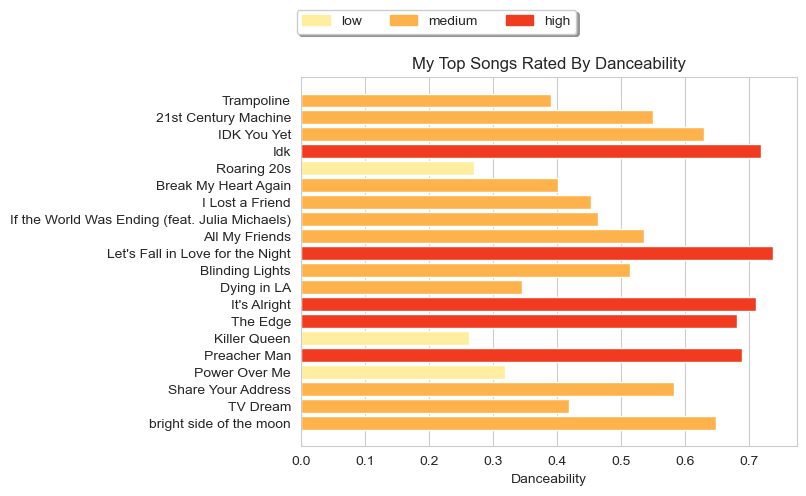

In [139]:
# Define the boundaries for each danceability level
danceability_bins = [0, 0.33, 0.66, 1.0]
danceability_labels = ["low", "medium", "high"]
danceability_colors = ["#ffeda0", "#feb24c", "#f03b20"]

# apply the cut function to create a new column with danceability levels
merged_data["danceability_level"] = pd.cut(merged_data["danceability"], bins=danceability_bins, labels=danceability_labels)

# Create a dictionary that maps each danceability level to its corresponding color in the palette
color_dict = dict(zip(danceability_labels, danceability_colors))

# Create a ListedColormap from the color dictionary
cmap = ListedColormap([color_dict[x] for x in danceability_labels])

# Create a list of colors that correspond to each danceability level
danceability_colors = [color_dict[x] for x in danceability_labels]

# Plot horizontal bar chart
plt.barh(merged_data['track_title'], merged_data['danceability'], color=[color_dict[x] for x in merged_data['danceability_level']])

# Add labels and title to the plot
plt.xlabel("Danceability")
plt.title("My Top Songs Rated By Danceability")
plt.grid(axis='y', alpha=0.0)

# Add legend to the plot
legend_handles = [mpatches.Patch(color=color_dict[x], label=x) for x in danceability_labels]
plt.legend(handles=legend_handles, bbox_to_anchor=(0.57, 1.20), ncol=3, fancybox=True, shadow=True)



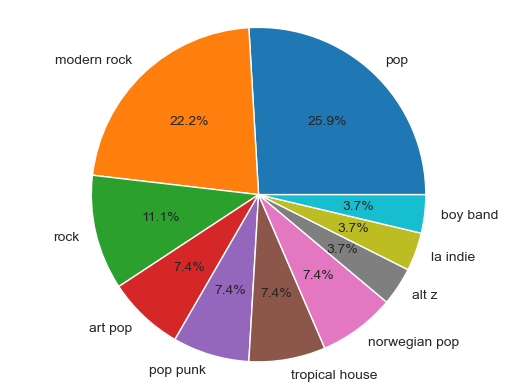

In [128]:
plt.pie(Dataset_3['count'], labels = Dataset_3['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [94]:
print(Dataset_1.columns)
print(Dataset_2.columns)

Index(['Unnamed: 0', 'track_title', 'artists', 'popularity', 'uri',
       'duration'],
      dtype='object')
Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'danceability_level'],
      dtype='object')
